# Name - Sunny Shubham 
## Assignment - California Housing Price Prediction.

#### Importing numpy and pandas

In [55]:
import numpy as np
import pandas as pd

## 1. Load the data 
### Read the “housing.csv” file from the folder into the program.

In [56]:
df = pd.read_excel("1553768847_housing.xlsx")

### Print first few rows of this data.

In [57]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


## 2. Handle missing values :


In [59]:
# Finding the missing value in colum
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

### Filling the missing values with the mean of the respective column.

In [60]:
#Filling the missing values with the mean of the respective column.
df.total_bedrooms.fillna(df.total_bedrooms.mean(), inplace = True)

#Verifying the data have missing or not
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [61]:
#finding the unique value of ocean proximity
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

### Extract input (X) and output (Y) data from the dataset. below features is input and label is output

In [62]:
features = df.iloc[:,:-1].values
label = df.iloc[:,-1].values

## 3. Encoding categorical data

In [63]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
focean_proximity = ohe.fit_transform(features[:,-1].reshape(-1,1))
focean_proximity

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [64]:
finalFeatures = np.concatenate((focean_proximity, features[:,:-1]) , axis = 1)

In [65]:
finalFeatures

array([[0.0, 0.0, 0.0, ..., 322, 126, 8.3252],
       [0.0, 0.0, 0.0, ..., 2401, 1138, 8.3014],
       [0.0, 0.0, 0.0, ..., 496, 177, 7.2574],
       ...,
       [0.0, 1.0, 0.0, ..., 1007, 433, 1.7],
       [0.0, 1.0, 0.0, ..., 741, 349, 1.8672],
       [0.0, 1.0, 0.0, ..., 1387, 530, 2.3886]], dtype=object)

In [66]:
finalFeatures[0]

array([0.0, 0.0, 0.0, 1.0, 0.0, -122.23, 37.88, 41, 880, 129.0, 322, 126,
       8.3252], dtype=object)

## 4. Split the dataset : 
Test Data - 20%,
Training Data - 80%

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(finalFeatures,
                                                label,
                                                test_size=0.2,
                                                random_state=3)

## 6. Perform Linear Regression : 


### Perform Linear Regression on training data.

In [68]:
from sklearn.linear_model import LinearRegression

linearReg = LinearRegression()
linearReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
train_score = linearReg.score(X_train,y_train)
test_score = linearReg.score(X_test,y_test)

In [75]:
test_score

0.65312918790106

In [76]:
train_score

0.6435167106972496

### Predict output for test dataset using the fitted model.

In [77]:
y_predict = linearReg.predict(X_test)

In [78]:
y_predict

array([201533.36092236,  56760.8294911 , 200738.74916068, ...,
       340572.31112025, 167615.82298947, 160736.09784801])

### Print root mean squared error (RMSE) from Linear Regression.

In [79]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_predict))

67732.93516749999

## 7. Bonus exercise: Perform Linear Regression with one independent variable :

### Extract just the median_income column from the independent variables (from X_train and X_test).

In [80]:
X_train_med_inc = X_train[:,[-1]].reshape(-1,1)

In [81]:
X_test_med_inc = X_test[:,[-1]].reshape(-1,1)

In [82]:
X_train_med_inc.shape

(16512, 1)

### Perform Linear Regression to predict housing values based on median_income.


In [84]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train_med_inc,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predict output for test dataset using the fitted model.


In [85]:
y_predict = linreg.predict(X_test_med_inc)
y_predict

array([195386.17838079, 168842.24461791, 182611.02309384, ...,
       350871.50790753, 238525.28935466, 190397.18799912])

### Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

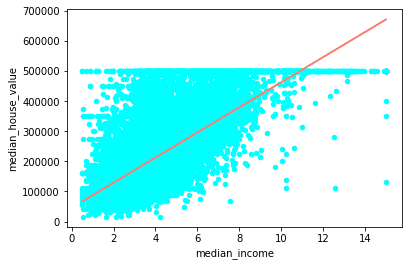

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df.plot(kind='scatter',x='median_income',y='median_house_value',c='cyan')
plt.plot(X_test_med_inc,y_predict,c='salmon')